In [1]:
#Import all the important libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest


In [2]:
#reading the csv data
trainData = pd.read_csv(r'E:\Shubha Data Science\revenue\data\train.csv')
testData = pd.read_csv(r'E:\Shubha Data Science\revenue\data\test.csv')
trainData.head()


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [5]:
# Numerical columns
num_col = trainData.select_dtypes(exclude=['object']).columns
# Categorical columns


cat_col = trainData.select_dtypes(include=['object']).columns

In [6]:
num_col

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [7]:
cat_col

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')

In [8]:
testData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [9]:
print("Train :",trainData.shape)
print("Test:",testData.shape)

Train : (137, 43)
Test: (100000, 42)


# PRE-PROCESSING & SOME ANALYSIS 

In [12]:
# get column with null values


trainData.columns[trainData.isna().any()].tolist()

[]

In [13]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')   
trainData['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y') 
dateLastTrain.head()


trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)



In [14]:
trainData.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3159


# Comparing the revenues of big cities and other cities

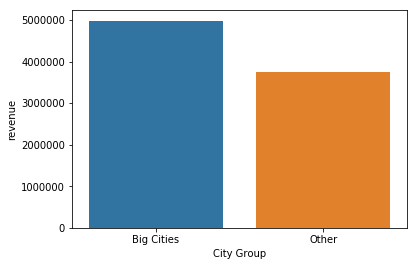

In [15]:
cityPerc = trainData[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=cityPerc)


# Sorting the cities by revenue; getting the max earned cities

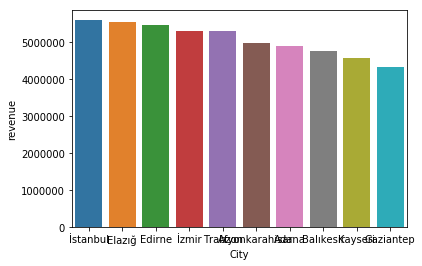

In [16]:
cityPerc = trainData[["City", "revenue"]].groupby(['City'],as_index=False).mean()
newDF = cityPerc.sort_values(["revenue"],ascending= False)
sns.barplot(x='City', y='revenue', data=newDF.head(10))


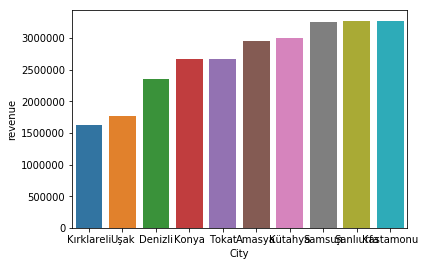

In [17]:



cityPerc = trainData[["City", "revenue"]].groupby(['City'],as_index=False).mean()
newDF = cityPerc.sort_values(["revenue"],ascending= True)
sns.barplot(x='City', y='revenue', data=newDF.head(10))

# Getting an insight of which restaurant type earns more

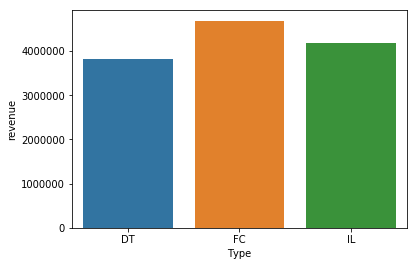

In [18]:
cityPerc = trainData[["Type", "revenue"]].groupby(['Type'],as_index=False).mean()
sns.barplot(x='Type', y='revenue', data=cityPerc)

Plot about working days of specific restaurant types

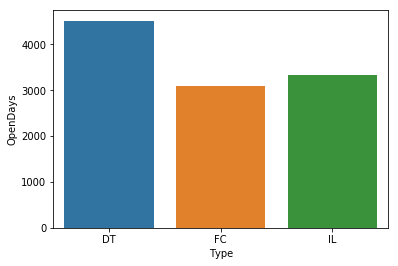

In [19]:

cityPerc = trainData[["Type", "OpenDays"]].groupby(['Type'],as_index=False).mean()
sns.barplot(x='Type', y='OpenDays', data=cityPerc)

In [20]:
trainData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3159


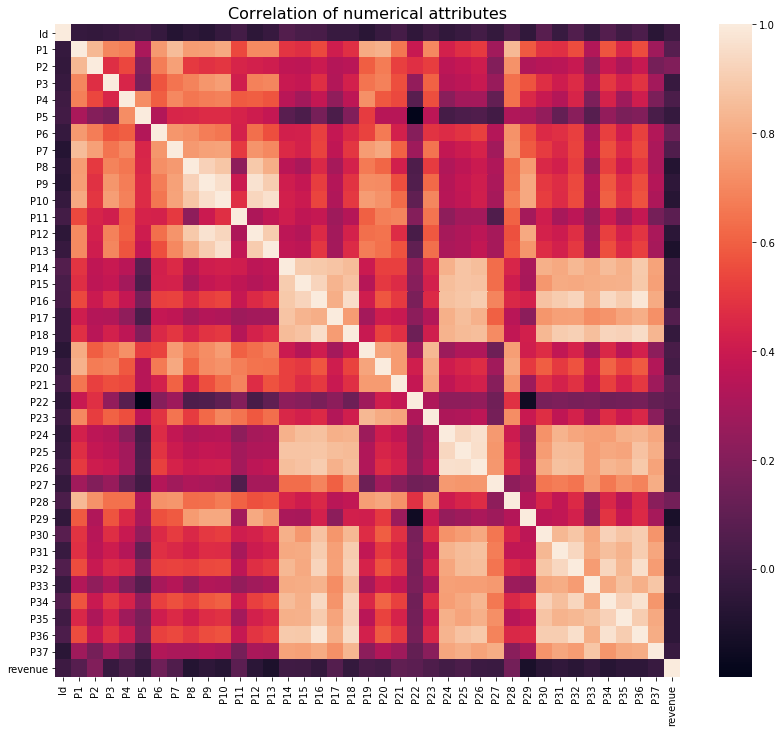

In [21]:
# Correlation
correlation = trainData[num_col].corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [22]:
correlation['revenue'].sort_values(ascending=False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64

In [23]:
trainData = trainData.drop('Open Date', axis=1)
trainData = trainData.drop('Id', axis=1)
trainData.head(5)

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,3159


In [24]:

# Converting dummy data for categorical cloumn City Group

In [25]:


citygroupDummyTrain = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(citygroupDummyTrain)

In [26]:
trainData = trainData.drop('City Group', axis=1)
trainData.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,4,5,5,4,3,4,5653753.0,6743,1,0
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,6923131.0,3609,1,0
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,2055379.0,1759,0,1
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,10,6,18,12,12,6,2675511.0,2160,0,1
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,3,2,3,4,3,3,4316715.0,3159,0,1


# Data preprocessing for test data

In [27]:
# We will do all the data manupulation in test data , what we have done for traning data
testData['Open Date'] = pd.to_datetime(testData['Open Date'], format='%m/%d/%Y')


testData['OpenDays']=""

 
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(testData)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y')  


testData['OpenDays'] = dateLastTest['Date'] - testData['Open Date']


testData['OpenDays'] = testData['OpenDays'].astype('timedelta64[D]').astype(int)


testData = testData.drop('Open Date', axis=1)


citygroupDummyTest = pd.get_dummies(testData['City Group'])
testData = testData.join(citygroupDummyTest)

testData = testData.drop('City Group', axis=1)

In [28]:
testData.head()

,Id,City,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Big Cities,Other
0,0,Niğde,FC,1,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,1440,0,1
1,1,Konya,IL,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,1385,0,1
2,2,Ankara,FC,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,428,1,0
3,3,Kocaeli,IL,2,4.0,4.0,4.0,2,3,5,...,4,0,0,0,0,0,0,605,0,1
4,4,Afyonkarahisar,FC,2,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,519,0,1


# Data preparation for model building 

In [29]:
import numpy
xTrain = pd.DataFrame({'OpenDays':trainData['OpenDays'].apply(numpy.log),
                      'Big Cities':trainData['Big Cities'], 'Other':trainData['Other'],
                      'P1':trainData['P1'], 'P2':trainData['P2'], 'P4':trainData['P4'],
                       'P5':trainData['P5'], 'P6':trainData['P6'],'P7':trainData['P7'], 
                       'P11':trainData['P11'], 'P14':trainData['P14'], 'P15':trainData['P15'],
                       'P17':trainData['P17'], 'P19':trainData['P19'], 'P20':trainData['P20'],
                       'P21':trainData['P21'], 'P23':trainData['P23'], 'P24':trainData['P24'],
                       'P25':trainData['P25'], 'P28':trainData['P28']})
                    
                      
yTrain = trainData['revenue'].apply(numpy.log)

xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(numpy.log),
                      'Big Cities':testData['Big Cities'], 'Other':testData['Other'],
                      'P1':testData['P1'], 'P2':testData['P2'], 'P7':testData['P7'],
                       'P4':testData['P4'], 'P5':testData['P5'], 'P6':testData['P6'],
                        'P11':testData['P11'], 'P14':testData['P14'], 'P15':testData['P15'],
                       'P17':testData['P17'], 'P25':testData['P25'],'P24':testData['P24'],
                      'P19':testData['P19'], 'P20':testData['P20'], 'P21':testData['P21'],
                     'P23':testData['P23'],'P28':testData['P28']}) 
                       

# Standardize features by removing the mean and scaling to unit variance

In [30]:

#Standard Scaling for model efficiency

In [31]:



from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

# Model - Linear Rgression

In [32]:
from sklearn import linear_model


# Create linear regression object
regr = linear_model.LinearRegression()


# Train the model using the training sets
regr.fit(xTrain, yTrain)

# Make predictions using the testing set
linear_predictions = regr.predict(xTest)

linear_predictions

array([15.30860723, 14.89987913, 14.70653566, ..., 14.98118463,
       15.57557516, 15.01687886])

In [33]:
regr.score(xTrain,yTrain)

0.25299885361289143

# Model - RandomForestRegressor

In [34]:
#We are training the model with RandomForestRegressor
forest = RandomForestRegressor(n_estimators=150)
forest.fit(xTrain, yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:

pred = forest.predict(xTest)
pred = numpy.exp(pred)
scoreOfModel=forest.score(xTrain, yTrain)
print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.8845870211444556


In [36]:

pred = forest.predict(xTest)
pred = numpy.exp(pred)

In [37]:


pred

array([3222380.51104089, 3127241.84407026, 3306946.58931   , ...,
       2836701.86406233, 3164545.59112687, 3616928.56749152])



# Model - XGBoost Regressor 

In [38]:
import xgboost as xgb
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgbr=best_xgb_model.fit(xTrain,yTrain)

In [39]:

xgbrscoreOfModel=xgbr.score(xTrain, yTrain)
print("Score is calculated as: ",xgbrscoreOfModel)


Score is calculated as:  0.957441575852019


In [40]:
import numpy
xTrain = pd.DataFrame({'OpenDays':trainData['OpenDays'].apply(numpy.log),
                      'Big Cities':trainData['Big Cities'], 'Other':trainData['Other'],
                      'P1':trainData['P1'], 'P2':trainData['P2'], 'P3':trainData['P3'],
                       'P4':trainData['P4'], 'P5':trainData['P5'], 'P6':trainData['P6'],
                       'P7':trainData['P7'], 'P8':trainData['P8'], 'P9':trainData['P9'],
                       'P10':trainData['P10'], 'P11':trainData['P11'], 'P12':trainData['P12'],
                       'P13':trainData['P13'], 'P14':trainData['P14'], 'P15':trainData['P15'],
                       'P16':trainData['P16'], 'P17':trainData['P17'], 'P18':trainData['P18'],
                      'P19':trainData['P19'], 'P20':trainData['P20'], 'P21':trainData['P21'],
                      'P22':trainData['P22'], 'P23':trainData['P23'], 'P24':trainData['P24'],
                      'P25':trainData['P25'], 'P26':trainData['P26'], 'P27':trainData['P27'],
                      'P28':trainData['P28'], 'P29':trainData['P29'], 'P30':trainData['P30'],
                      'P31':trainData['P31'], 'P32':trainData['P32'], 'P33':trainData['P33'],
                      'P34':trainData['P34'], 'P35':trainData['P35'], 'P36':trainData['P36'],
                      'P37':trainData['P37']})

yTrain = trainData['revenue'].apply(numpy.log)

xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(numpy.log),
                      'Big Cities':testData['Big Cities'], 'Other':testData['Other'],
                      'P1':testData['P1'], 'P2':testData['P2'], 'P3':testData['P3'],
                       'P4':testData['P4'], 'P5':testData['P5'], 'P6':testData['P6'],
                       'P7':testData['P7'], 'P8':testData['P8'], 'P9':testData['P9'],
                       'P10':testData['P10'], 'P11':testData['P11'], 'P12':testData['P12'],
                       'P13':testData['P13'], 'P14':testData['P14'], 'P15':testData['P15'],
                       'P16':testData['P16'], 'P17':testData['P17'], 'P18':testData['P18'],
                      'P19':testData['P19'], 'P20':testData['P20'], 'P21':testData['P21'],
                      'P22':testData['P22'], 'P23':testData['P23'], 'P24':testData['P24'],
                      'P25':testData['P25'], 'P26':testData['P26'], 'P27':testData['P27'],
                      'P28':testData['P28'], 'P29':testData['P29'], 'P30':testData['P30'],
                      'P31':testData['P31'], 'P32':testData['P32'], 'P33':testData['P33'],
                      'P34':testData['P34'], 'P35':testData['P35'], 'P36':testData['P36'],
                      'P37':testData['P37']})



# Model - Linear Rgression

In [41]:
from sklearn import linear_model


# Create linear regression object
regr = linear_model.LinearRegression()


# Train the model using the training sets
regr.fit(xTrain, yTrain)

# Make predictions using the testing set
linear_predictions = regr.predict(xTest)

linear_predictions

array([14.95926469, 14.67751276, 14.22762792, ..., 14.99973364,
       14.90256387, 15.57417114])

In [42]:
regr.score(xTrain,yTrain)

0.3783624538153161

# Model - RandomForestRegressor

In [43]:
#We are training the model with RandomForestRegressor
forest = RandomForestRegressor(n_estimators=150)
forest.fit(xTrain, yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
pred = forest.predict(xTest)
pred = numpy.exp(pred)
scoreOfModel=forest.score(xTrain, yTrain)
print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.8911514502446164


# Model - XGBoost Regressor

In [45]:
import xgboost as xgb
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgbr=best_xgb_model.fit(xTrain,yTrain)

In [46]:
xgbrscoreOfModel=xgbr.score(xTrain, yTrain)
print("Score is calculated as: ",xgbrscoreOfModel)


Score is calculated as:  0.9652011345246966
